In [2]:
import drawsvg as dw

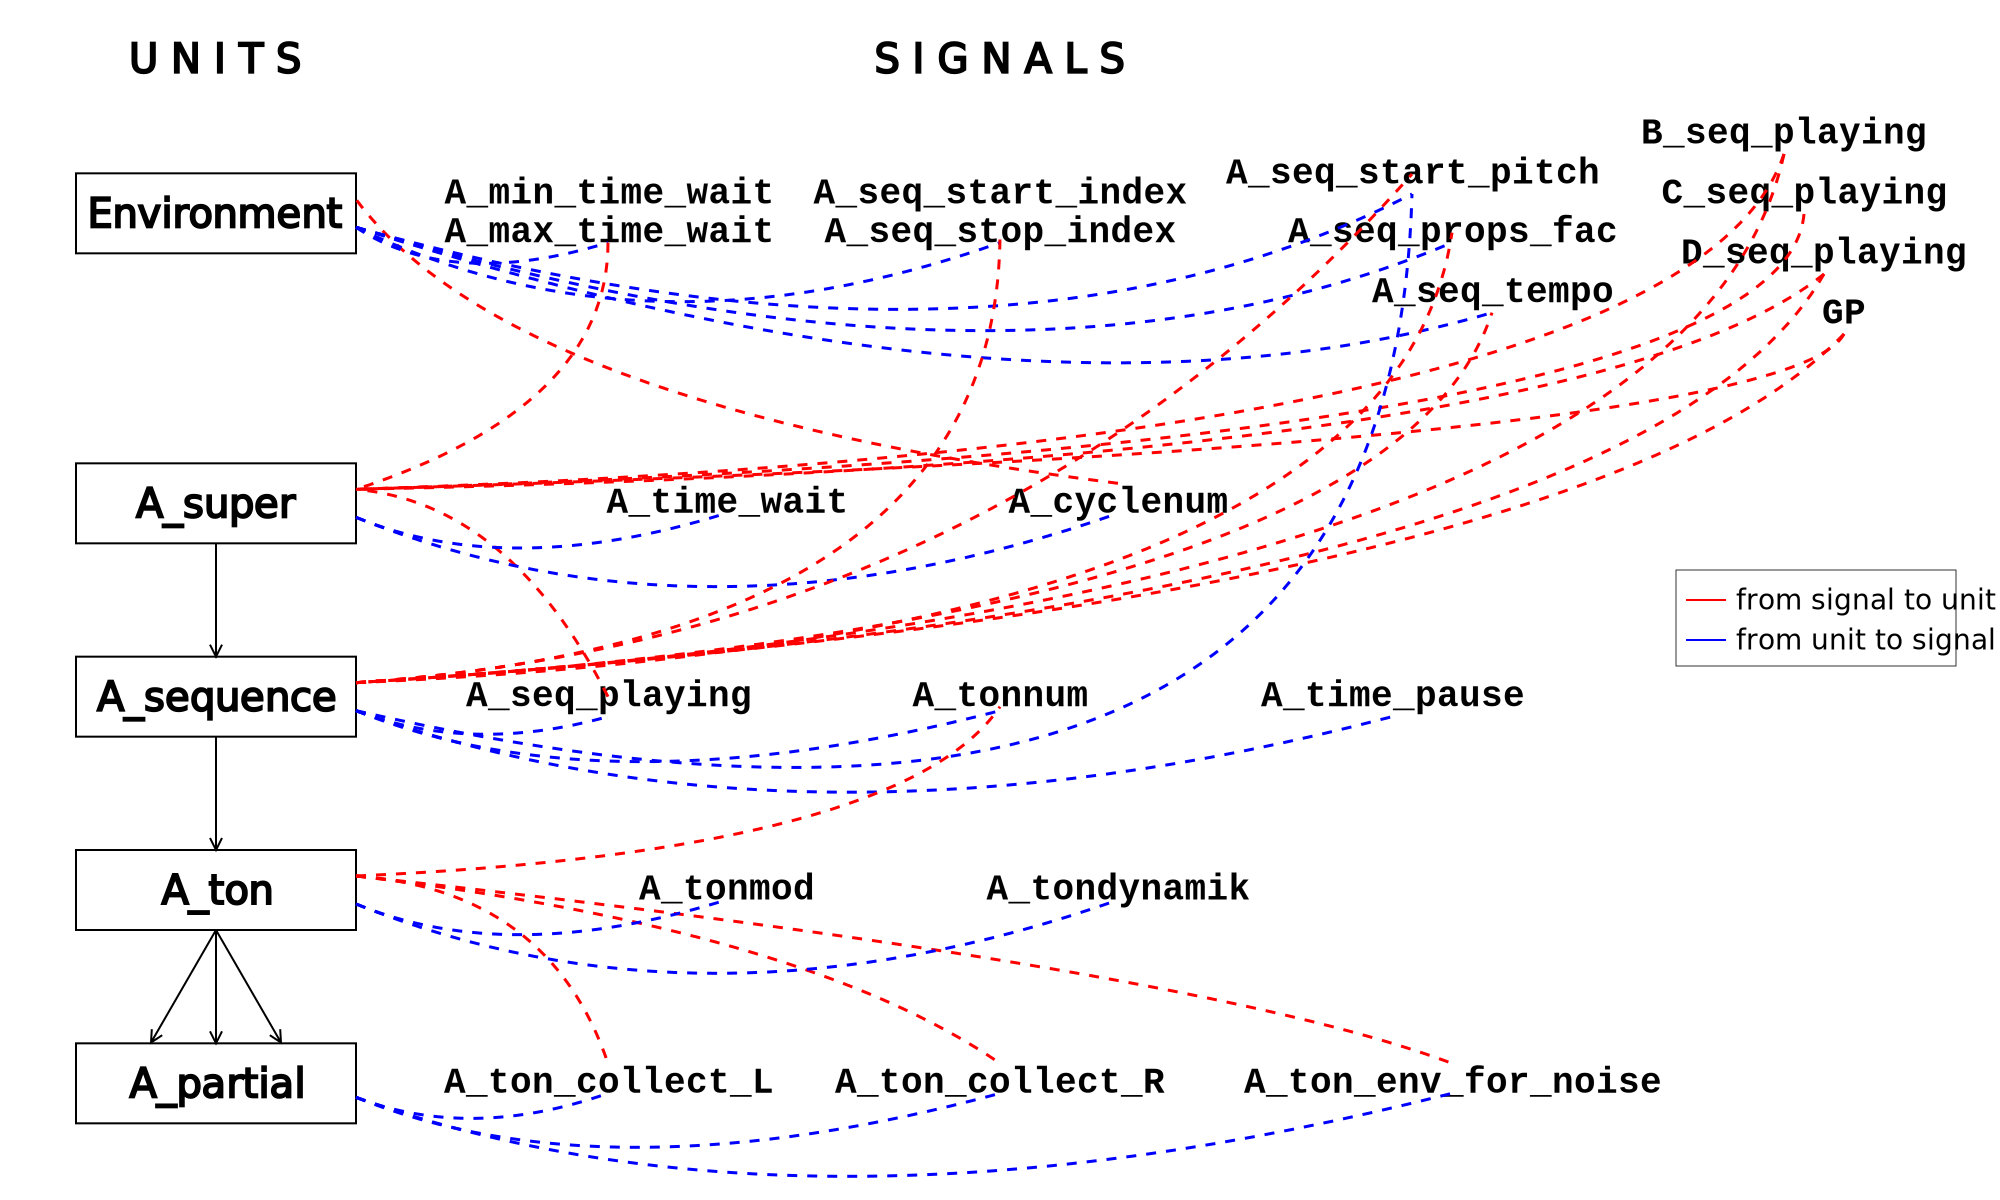

In [159]:
w,h = 1000,600
d = dw.Drawing(w,h,font_family='Courier')

xnum,ynum = 11,7 # posts (= one more than divisions)
mleft,mright,mtop,mbot = 10,10,10,10
xsize,ysize = w-mleft-mright,h-mtop-mbot
xunit,yunit = xsize / (xnum-1),ysize / (ynum-1)

def scale(inval,inmin,inmax,outmin,outmax):
    """scales inval which is between inmin and inmax
    to the range between outmin and outmax"""
    return (inval-inmin)*((outmax-outmin)/(inmax-inmin))+outmin

def xg(inval,off=0):
    """for xnum=4, inval is from 0 (left) to 3 (right)
    as range to write
    off is subtracted from inval"""
    inval -= off
    return scale(inval,0,xnum-1,mleft,mleft+xsize)

def yg(inval):
    """for num=11, inval is from 0 (top) to 10 (bottom)
    as range to write"""
    return scale(inval,0,ynum-1,mtop,mtop+ysize)

def vert_arrow(x,y1,y2,w=6):
    p = dw.Path(stroke='black',fill='none')
    p.M(x,y1)
    p.V(y2)
    p.M(x-w/2,y2-w)
    p.L(x,y2)
    p.L(x+w/2,y2-w)
    d.append(p)

def arrow(x=10,y=10,l=30,w=6,rot=0,c='black',sw=1,**args):
    """simple arrow. rot=0 means downwards"""
    y2 = y+l
    p1 = x-w/2,y2-w
    p2 = x+w/2,y2-w
    p = dw.Path(stroke_width=sw,stroke=c,fill='none',transform='rotate(%f %f %f)' % (rot,x,y),**args)
    p.M(x,y)
    p.V(y2)
    p.M(*p1)
    p.L(x,y2)
    p.L(*p2)
    d.append(p)

def instr(x_mid,y_mid,w=100,h=40,text='linseg',textsize=20):
    y_top,y_bot = y_mid-h/2,y_mid+h/2
    d.append(dw.Rectangle(x_mid-w/2,y_top,w,h,stroke='black',fill='none'))
    d.append(dw.Text(text,textsize,x_mid,y_mid,dominant_baseline='middle',
                 text_anchor='middle',style='font-family: Simvoni',stroke='black'))
    x_left,x_right = x_mid-w/2,x_mid+w/2
    return ((x_left,x_mid,x_right,y_top,y_mid,y_bot))

def signal(name,x,y):
    """x,y is center"""
    d.append(dw.Text(name,18,x,y,font_weight='bold',dominant_baseline='middle',
                 text_anchor='middle'))

def connect(x0,y0,x1,y1,xc,yc,c='red'):
    """xy0 = start, xy1 = target, xyc = control point"""
    p = dw.Path(stroke=c,stroke_width=1.5,fill='none',stroke_dasharray='5,5')
    p.M(x0,y0)
    p.Q(xc,yc,x1,y1)
    d.append(p)


    
# basic settings
x_instr = xg(1)
x_signals_left = xg(3)
x_signals_mid = xg(5) #position der überschrift
x_signals_right = xg(7)
x_signals_rightright = xg(9)
y_title = yg(0.2)
y_envir = yg(1)
y_envir_top = yg(0.9)
y_envir_bot = yg(1.1)
y_super = yg(2.5)
y_seq = yg(3.5)
y_ton = yg(4.5)
y_part = yg(5.5)

# left side
d.append(dw.Text('U N I T S',20,x_instr,y_title,dominant_baseline='middle',
                 text_anchor='middle',style='font-family: Simvoni',stroke='black'))
env_pos = instr(x_instr,y_envir,w=140,text='Environment')
super_pos = instr(x_instr,y_super,w=140,text='A_super')
seq_pos = instr(x_instr,y_seq,w=140,text='A_sequence')
ton_pos = instr(x_instr,y_ton,w=140,text='A_ton')
part_pos = instr(x_instr,y_part,w=140,text='A_partial')
vert_arrow(x_instr,super_pos[5],seq_pos[3])
vert_arrow(x_instr,seq_pos[5],ton_pos[3])
vert_arrow(x_instr,ton_pos[5],part_pos[3])
arrow(x_instr,ton_pos[5],65,rot=30)
arrow(x_instr,ton_pos[5],65,rot=-30)

# right side
d.append(dw.Text('S I G N A L S',20,x_signals_mid,y_title,dominant_baseline='middle',
                 text_anchor='middle',style='font-family: Simvoni',stroke='black'))
 # env
signal('A_min_time_wait',x_signals_left,y_envir_top)
signal('A_max_time_wait',x_signals_left,y_envir_bot)
signal('A_seq_start_index',x_signals_mid,y_envir_top)
signal('A_seq_stop_index',x_signals_mid,y_envir_bot)
signal('A_seq_start_pitch',x_signals_right+10,y_envir_top-10)
signal('A_seq_props_fac',x_signals_right+30,y_envir_bot)
signal('A_seq_tempo',x_signals_right+50,y_envir_bot+30)
signal('B_seq_playing',x_signals_rightright,y_envir_top-30)
signal('C_seq_playing',x_signals_rightright+10,y_envir_top)
signal('D_seq_playing',x_signals_rightright+20,y_envir_top+30)
signal('GP',x_signals_rightright+30,y_envir_top+60)
 # super
signal('A_time_wait',x_signals_left+xg(0.5),y_super)
signal('A_cyclenum',x_signals_mid+xg(0.5),y_super)
 # seq
signal('A_seq_playing',x_signals_left,y_seq)
signal('A_tonnum',x_signals_mid,y_seq)
signal('A_time_pause',x_signals_right,y_seq)
 # ton
signal('A_tonmod',x_signals_left+xg(0.5),y_ton)
signal('A_tondynamik',x_signals_mid+xg(0.5),y_ton)
 # partial
signal('A_ton_collect_L',x_signals_left,y_part)
signal('A_ton_collect_R',x_signals_mid,y_part)
signal('A_ton_env_for_noise',x_signals_right+30,y_part)
    
# connections
 # zu Environment
connect(x_signals_mid+xg(0.5),y_super-10,env_pos[2],env_pos[4]-7,xg(2.5),yg(2))
 # von environment
connect(env_pos[2],env_pos[4]+7,x_signals_left,y_envir_bot+5,xg(2.2),yg(1.4),c='blue')
connect(env_pos[2],env_pos[4]+7,x_signals_mid,y_envir_bot+5,xg(3.2),yg(1.8),c='blue')
connect(env_pos[2],env_pos[4]+7,x_signals_right+10,y_envir_top,xg(5),yg(2),c='blue')
connect(env_pos[2],env_pos[4]+7,x_signals_right+30,y_envir_bot+5,xg(5.1),yg(2.1),c='blue')
connect(env_pos[2],env_pos[4]+7,x_signals_right+50,y_envir_bot+40,xg(5.2),yg(2.2),c='blue')
 # zu A_super
    # von A_min/max_time_wait
connect(x_signals_left,y_envir_bot+5,super_pos[2],super_pos[4]-7,xg(3),yg(2))
    # von A_seq_playing
connect(x_signals_left,y_seq,super_pos[2],super_pos[4]-7,xg(2.5),yg(2.5))
    # von BCD seq playing
connect(x_signals_rightright,y_envir_top-20,super_pos[2],super_pos[4]-7,xg(8.5),yg(2.2))
connect(x_signals_rightright+10,y_envir_top+10,super_pos[2],super_pos[4]-7,xg(9),yg(2.2))
connect(x_signals_rightright+20,y_envir_top+40,super_pos[2],super_pos[4]-7,xg(8),yg(2.3))
connect(x_signals_rightright+30,y_envir_top+70,super_pos[2],super_pos[4]-7,xg(9),yg(2.2))
 # von A super
connect(super_pos[2],super_pos[4]+7,x_signals_left+xg(0.5),y_super+5,xg(2.5),yg(2.9),c='blue')
connect(super_pos[2],super_pos[4]+7,x_signals_mid+xg(0.5),y_super+5,xg(3.5),yg(3.3),c='blue')
 # zu A sequence
connect(seq_pos[2],seq_pos[4]-7,x_signals_mid,y_envir_bot,xg(5),yg(3.2))
connect(seq_pos[2],seq_pos[4]-7,x_signals_right+10,y_envir_top-10,xg(5),yg(3.2))
connect(seq_pos[2],seq_pos[4]-7,x_signals_right+30,y_envir_bot,xg(7),yg(3.2))
connect(seq_pos[2],seq_pos[4]-7,x_signals_right+50,y_envir_bot+40,xg(7),yg(3.1))
connect(x_signals_rightright,y_envir_top-20,seq_pos[2],seq_pos[4]-7,xg(8.5),yg(3))
connect(x_signals_rightright+20,y_envir_top+40,seq_pos[2],seq_pos[4]-7,xg(8.25),yg(3))
connect(x_signals_rightright+30,y_envir_top+70,seq_pos[2],seq_pos[4]-7,xg(8),yg(3))
 # von A sequence
connect(seq_pos[2],seq_pos[4]+7,x_signals_right+10,y_envir_top,xg(7),yg(4.8),c='blue')
connect(seq_pos[2],seq_pos[4]+7,x_signals_left,y_seq+10,xg(2.3),yg(3.8),c='blue')
connect(seq_pos[2],seq_pos[4]+7,x_signals_mid,y_seq+7,xg(3),yg(4.1),c='blue')
connect(seq_pos[2],seq_pos[4]+7,x_signals_right,y_seq+10,xg(4),yg(4.4),c='blue')
 # zu A ton
connect(ton_pos[2],ton_pos[4]-7,x_signals_mid,y_seq+5,xg(4.5),yg(4.3))
connect(ton_pos[2],ton_pos[4]-7,x_signals_left,y_part-10,xg(2.7),yg(4.5))
connect(ton_pos[2],ton_pos[4]-7,x_signals_mid,y_part-10,xg(4),yg(4.7))
connect(ton_pos[2],ton_pos[4]-7,x_signals_right+30,y_part-10,xg(6),yg(4.9))
 # von A ton
connect(ton_pos[2],ton_pos[4]+7,x_signals_left+xg(0.5),y_ton+5,xg(2.5),yg(4.9),c='blue')
connect(ton_pos[2],ton_pos[4]+7,x_signals_mid+xg(0.5),y_ton+5,xg(3.5),yg(5.3),c='blue')
 # von A partial
connect(part_pos[2],part_pos[4]+7,x_signals_left,y_part+5,xg(2.3),yg(5.8),c='blue')
connect(part_pos[2],part_pos[4]+7,x_signals_mid,y_part+5,xg(3),yg(6.1),c='blue')
connect(part_pos[2],part_pos[4]+7,x_signals_right+30,y_part+5,xg(4),yg(6.4),c='blue')

# legende
x_leg,y_leg = xg(8.5),yg(3)
d.append(dw.Rectangle(x_leg-5,y_leg-15,140,48,fill='none',stroke='black',stroke_width=0.4))
d.append(dw.Line(x_leg,y_leg,x_leg+20,y_leg,stroke='red'))
d.append(dw.Text('from signal to unit',14,x_leg+25,y_leg,font_family="Simvoni",dominant_baseline='middle'))
y_leg += 20
d.append(dw.Line(x_leg,y_leg,x_leg+20,y_leg,stroke='blue'))
d.append(dw.Text('from unit to signal',14,x_leg+25,y_leg,font_family="Simvoni",dominant_baseline='middle'))

d.set_pixel_scale(2)
#d.save_svg('fernnah-signals-A.svg')
d.save_png('fernnah-signals-A.png')
d